In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
sys.path.insert(0,'../')

In [3]:
from src.mlflow_utils import mlflow, get_run_list, download_run_data
from evaluate import load
from tqdm.notebook import tqdm

/home/jfeil/.pyenv/versions/3.10.12/envs/MasterThesis-NLP/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/home/jfeil/.pyenv/versions/3.10.12/envs/MasterThesis-NLP/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/home/jfeil/.pyenv/versions/3.10.12/envs/MasterThesis-NLP/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


# Scores

In [7]:
index = 412
index = 74

predictions = eval_data['data'][index][3].replace('</s>', '')
targets = eval_data['data'][index][2]
print(eval_data['data'][index])

print("X: " + str(predictions))
print("Y: " + str(targets))

["Japans --- „Das Klima ''Japans'' ist aufgrund der Insellage, der Gebirgsrücken und der großen Nord-Süd-Erstreckung sehr uneinheitlich.“", {'title': 'Japan', 'context_word': 'Japans', 'context_sentence': '„Das Klima Japans ist aufgrund der Insellage, der Gebirgsrücken und der großen Nord-Süd-Erstreckung sehr uneinheitlich.“'}, 'Inselstaat in Ostasien', 'Inselstaat in Ostasien</s>', 11, 0.0003643642, 9.2, 17.8, 0.8571428571]
X: Inselstaat in Ostasien
Y: Inselstaat in Ostasien


In [10]:
calc_bertscore([predictions], [targets])

Using the latest cached version of the module from /home/jfeil/.cache/huggingface/modules/evaluate_modules/metrics/evaluate-metric--bertscore/cf4907b18f8f741f202232c0f8009a3bd49ff98802c245abcb6ea51a37a8c05b (last modified on Mon Apr 15 12:24:13 2024) since it couldn't be found locally at evaluate-metric--bertscore, or remotely on the Hugging Face Hub.


[1.0000001192092896, 1.0000001192092896, 1.0000001192092896]

## MoverScore

In [27]:
# pip install git+https://github.com/jfeil/emnlp19-moverscore.git --force

In [ ]:
# a71e5cfb0a954f63b17c3c7b3c626e64 --> 0.5247959426263278
# 71254e7e5ced4ce2a27c5de31f7fb7ab --> 0.5241627966732723
# e1d3f1f8aace43caa693e9836834504e --> 
# cb8135f768dd4a8285257deb0bc3d912 --> 0.5240697396879908
# 5565790ff7c74ef69997fc0af6a3cd06 --> 0.5254168598952033
# 41ef3452981a4b208aa35c8f8b7197df --> 0.5104922168193816
# 14ae3307f7df4c26b249b847ef24c26a --> 0.5018933512907802
# ebee22c9aef14c8baaca0ec3192e8833 --> 0.5103564892456643
# 9eaf7a3028bd4b2cb773d0105f165add --> 0.5231842858875173
# 7e5d6c8cba4d49a8853e5e4c06072da7 --> 0.5239859657285223

scores / len(eval_data['data'])

In [9]:
## ROUGE-L1

In [10]:
## Token Analysis

## Scoring

In [4]:
from src.evaluation import calc_bertscore, calc_moverscore, calc_rougescore

In [5]:
runs = get_run_list(experiment_ids=[1])

evaluation_data = {}
scoring_methods = [(('mover_score',), calc_moverscore),
                  (('bert_score_precision', 'bert_score_recall', 'bert_score_f1'), calc_bertscore),
                  (('rouge_score_1', 'rouge_score_2', 'rouge_score_l', 'rouge_score_lsum'), calc_rougescore)
]

reuse_columns = ['inputs', 'ground_truth', 'outputs']

run_bar = tqdm(runs)
for run_id in run_bar:
    eval_data = download_run_data(run_id)
    if run_id not in evaluation_data:
        indices = [eval_data['columns'].index(x) for x in reuse_columns]
        evaluation_data[run_id] = {
            'columns': list(reuse_columns),
            'data': [[row[x] for x in indices] for row in eval_data['data']]
        }
    score_bar = tqdm(scoring_methods, leave=False)
    for score_met in score_bar:
        evaluation_data[run_id]['columns'] += score_met[0]
        run_bar = tqdm(range(len(eval_data['data'])), leave=False)
        for i in run_bar:
            target = [evaluation_data[run_id]['data'][i][1]]
            prediction = [evaluation_data[run_id]['data'][i][2].replace('</s>', '')]
            
            new_score = score_met[1](prediction, target)
            evaluation_data[run_id]['data'][i] += new_score

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1107 [00:00<?, ?it/s]

  0%|          | 0/1107 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.10.12/envs/MasterThesis-NLP/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


  0%|          | 0/1107 [00:00<?, ?it/s]

MlflowException: The following failures occurred while downloading one or more artifacts from s3://mlflow/1/ab4f06d6aeda4c28bf0ee43e3c2f88a1/artifacts:
##### File  #####
An error occurred (404) when calling the HeadObject operation: Not Found

In [7]:
a = download_run_data('7e5d6c8cba4d49a8853e5e4c06072da7')

In [9]:
import pickle

with open("eval_data.pickle", 'wb+') as file:
    pickle.dump(evaluation_data, file)

In [6]:
evaluation_data

{'a71e5cfb0a954f63b17c3c7b3c626e64': {'columns': ['inputs',
   'ground_truth',
   'outputs',
   'mover_score',
   'bert_score_precision',
   'bert_score_recall',
   'bert_score_f1',
   'rouge_score_1',
   'rouge_score_2',
   'rouge_score_l',
   'rouge_score_lsum'],
  'data': [["Liebe --- Die ''Liebe'' überwindet alle Grenzen.",
    'inniges Gefühl der Zuneigung für jemanden oder für etwas',
    'starkes Gefühl der Zuneigung und Verbundenheit</s>',
    0.5977251465294603,
    0.8565904498100281,
    0.8186537623405457,
    0.8371925354003906,
    0.4210526315789474,
    0.3529411764705882,
    0.4210526315789474,
    0.4210526315789474],
   ["Liebe --- „Die ''Liebe'' ist in der Literatur ausreichend dargestellt worden, ihren Schilderungen kann nichts Neues hinzugefügt werden.“",
    'inniges Gefühl der Zuneigung für jemanden oder für etwas',
    'tiefe Gefühlsregung, Hingezogenheit zu jemandem/etwas.</s>',
    0.5834163862700178,
    0.7846994400024414,
    0.8016306161880493,
    0.793

In [7]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

In [8]:
for run_id in runs:
    observations = np.array([[x[y] for y in range(3, len(evaluation_data[run_id]['columns']))] for x in evaluation_data[run_id]['data']])
    print(run_id)
    print("")
    print(np.corrcoef(observations, rowvar=False))
    print(f"MEAN: {np.mean(observations, axis=0)}, MEDIAN: {np.median(observations, axis=0)}, STDEV: {np.std(observations, axis=0)}")
    print("")
    print("")

e23bb6ec28ef48d0b92d039472aab389

[[1.         0.49908358 0.59826055 0.66620769 0.66008703 0.51049629
  0.64993481 0.64978617]
 [0.49908358 1.         0.41635832 0.79135195 0.49899887 0.36962536
  0.48929994 0.48920623]
 [0.59826055 0.41635832 1.         0.88415373 0.48268646 0.40320268
  0.49014693 0.48945061]
 [0.66620769 0.79135195 0.88415373 1.         0.57845641 0.4573935
  0.57824413 0.57772738]
 [0.66008703 0.49899887 0.48268646 0.57845641 1.         0.69742386
  0.97777965 0.97794766]
 [0.51049629 0.36962536 0.40320268 0.4573935  0.69742386 1.
  0.72126327 0.72093804]
 [0.64993481 0.48929994 0.49014693 0.57824413 0.97777965 0.72126327
  1.         0.99978845]
 [0.64978617 0.48920623 0.48945061 0.57772738 0.97794766 0.72093804
  0.99978845 1.        ]]
MEAN: [0.52279886 0.60987326 0.65173677 0.62905685 0.07427088 0.01555263
 0.06982881 0.06989111], MEDIAN: [0.5213837  0.6106723  0.64812982 0.6261856  0.         0.
 0.         0.        ], STDEV: [0.02184694 0.0370951  0.05577009

KeyError: 'ab4f06d6aeda4c28bf0ee43e3c2f88a1'

MEAN: [0.52398597 0.64627794 0.65801564 0.65070749], MEDIAN: [0.52352703 0.64526689 0.65134263 0.64729297], STDEV: [0.02689507 0.06183438 0.05831727 0.052804  ]


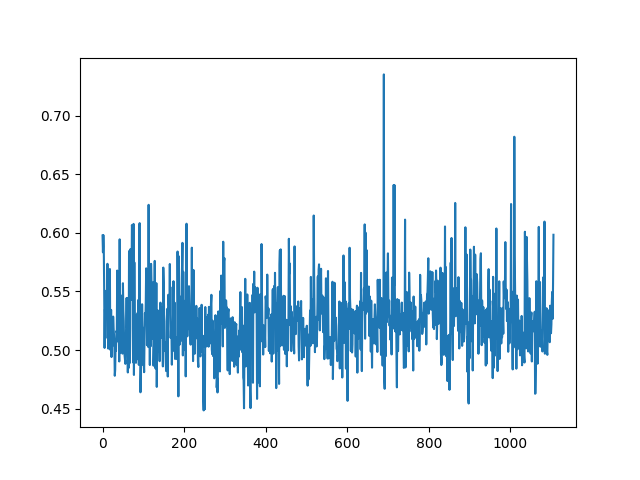

In [23]:
plt.plot()

In [24]:
plt.plot([x[6] for x in evaluation_data['a71e5cfb0a954f63b17c3c7b3c626e64']['data']])